# User Based Recommendation System

In [259]:
import numpy as np
import pandas as pd
from surprise import Reader, SVD, Dataset, accuracy
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100)


import warnings
warnings.filterwarnings('ignore')

### Importing Necessary Libraries

In [260]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [158]:
book= pd.read_csv('df_final_21_09___9794.csv',index_col=0)
rating = pd.read_csv('ratings.csv')


In [235]:
book.head()

,book_id,book_title,book_series,title,book_authors,genres,book_score,book_rating,book_rating_obj,book_rating_count,book_review_count,book_desc,tags,FE_text,book_desc_tags_FE,...,book_edition,book_format,original_publication_year,language_code,book_pages,book_pages_obj,books_count,books_count_obj,goodreads_book_id,book_isbn,isbn,isbn13,image_url_x,image_url_y,small_image_url
0,1,The Hunger Games,"The Hunger Games, #1","The Hunger Games (The Hunger Games, #1)",Suzanne Collins,Young Adult|Fiction|Science Fiction|Dystopia|F...,1.000000,4.33,4.0,5519135,160706,Winning will make you famous. Losing means cer...,to-read fantasy favorites currently-reading yo...,The-Hunger-Games Suzanne-Collins Young-Adult F...,Winning will make you famous. Losing means cer...,...,NaN,Hardcover,2008.0,eng,374.0,8.0,272,14.0,2767052,9.780440e+12,439023483,9.780439e+12,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603l...,https://images.gr-assets.com/books/1447303603s...
1,2,Harry Potter and the Philosopher's Stone,"Harry Potter, #1",Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",NaN,0.824569,4.44,4.0,6682936,108361,NaN,to-read fantasy favorites currently-reading yo...,Harry-Potter-and-the-Philosopher's-Stone J.K.-...,to-read fantasy favorites currently-reading y...,...,NaN,NaN,1997.0,eng,NaN,NaN,491,15.0,3,NaN,439554934,9.780440e+12,https://images.gr-assets.com/books/1474154022m...,NaN,https://images.gr-assets.com/books/1474154022s...
2,3,Twilight,"Twilight, #1","Twilight (Twilight, #1)",Stephenie Meyer,Young Adult|Fantasy|Romance|Paranormal|Vampire...,0.029020,3.58,3.5,4281268,97991,About three things I was absolutely positive.F...,to-read fantasy favorites currently-reading yo...,Twilight Stephenie-Meyer Young-Adult Fantasy R...,About three things I was absolutely positive.F...,...,NaN,Paperback,2005.0,en-US,498.0,9.0,226,14.0,41865,9.780320e+12,316015849,9.780316e+12,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443l...,https://images.gr-assets.com/books/1361039443s...
3,4,To Kill a Mockingbird,-,To Kill a Mockingbird,Harper Lee,Classics|Fiction|Historical|Historical Fiction...,0.231059,4.27,4.0,3745197,79450,The unforgettable novel of a childhood in a sl...,to-read favorites currently-reading young-adul...,To-Kill-a-Mockingbird Harper-Lee Classics Fict...,The unforgettable novel of a childhood in a sl...,...,50th Anniversary,Paperback,1960.0,eng,324.0,8.0,487,15.0,2657,9.780060e+12,61120081,9.780061e+12,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680l...,https://images.gr-assets.com/books/1361975680s...
4,5,The Great Gatsby,-,The Great Gatsby,F. Scott Fitzgerald,Classics|Fiction|Academic|School|Literature|Hi...,0.049427,3.90,3.5,3141842,56953,Alternate Cover Edition ISBN: 0743273567 (ISBN...,to-read favorites currently-reading young-adul...,The-Great-Gatsby F.-Scott-Fitzgerald Classics ...,Alternate Cover Edition ISBN: 0743273567 (ISBN...,...,US / CAN,Paperback,1925.0,eng,180.0,5.0,1356,15.0,4671,NaN,743273567,9.780743e+12,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560l...,https://images.gr-assets.com/books/1490528560s...


In [159]:
rating.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [261]:
df=rating.merge(book[["book_id","book_title","book_authors"]],on="book_id")  
df.shape

(5911089, 5)

In [262]:
comment_counts = pd.DataFrame(df["book_title"].value_counts())

In [263]:
rare_books = comment_counts[comment_counts["book_title"] <= 100].index

In [264]:
common_books = df[~df["book_title"].isin(rare_books)]

In [265]:
user_book_df = common_books.pivot_table(index=["user_id"], columns=["book_title"], values="rating")

In [266]:
user_book_df

book_title,,A Monster Calls,Animal Farm & 1984,"Burned (Burned, #1)",Call the midwife : a true story of the East End in the 1950s,"Carry On, Warrior: Thoughts on Life Unarmed",Carter Beats the Devil,Crown of Shadows,Daemon,De Imitatione Christi,Evil at Heart,Faust. Der Tragödie erster und zweiter Teil,Feeling Good: The New Mood Therapy,Innocent Traitor,Kaleidoscope Hearts,...,花より男子 1,論語 [Lún Yǔ],象の消滅 [Zō no shōmetsu],走ることについて語るときに僕の語ること [Hashiru koto ni tsuite kataru toki ni boku no kataru koto],進撃の巨人 1,道德經 [dào dé jīng],鋼の錬金術師 1,雪国,青の祓魔師 1,高校デビュー 1,黑暗森林,黒執事 I [Kuroshitsuji I],黒執事 II [Kuroshitsuji II],엄마를 부탁해,채식주의자
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
random_user = int(pd.Series(user_book_df.index).sample(1).values)

In [291]:
random_user_df = user_book_df[user_book_df.index == random_user]

In [292]:
random_user_df

book_title,,A Monster Calls,Animal Farm & 1984,"Burned (Burned, #1)",Call the midwife : a true story of the East End in the 1950s,"Carry On, Warrior: Thoughts on Life Unarmed",Carter Beats the Devil,Crown of Shadows,Daemon,De Imitatione Christi,Evil at Heart,Faust. Der Tragödie erster und zweiter Teil,Feeling Good: The New Mood Therapy,Innocent Traitor,Kaleidoscope Hearts,...,花より男子 1,論語 [Lún Yǔ],象の消滅 [Zō no shōmetsu],走ることについて語るときに僕の語ること [Hashiru koto ni tsuite kataru toki ni boku no kataru koto],進撃の巨人 1,道德經 [dào dé jīng],鋼の錬金術師 1,雪国,青の祓魔師 1,高校デビュー 1,黑暗森林,黒執事 I [Kuroshitsuji I],黒執事 II [Kuroshitsuji II],엄마를 부탁해,채식주의자
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

[' The Fellowship of the Ring',
 'A Clockwork Orange',
 'A Confederacy of Dunces',
 'A Light in the Attic',
 'A Separate Peace',
 'A Streetcar Named Desire',
 'A Thousand Splendid Suns',
 'A Wrinkle in Time',
 'About a Boy',
 'American Psycho',
 'An Excellent conceited Tragedie of Romeo and Juliet',
 'Animal Farm: A Fairy Story',
 'Animalia',
 'Barrel Fever: Stories and Essays',
 'Beautiful Disaster',
 'Beloved',
 'Brave New World',
 'Brüder Grimm: Kinder- und Hausmärchen',
 'Candide',
 'Carrie',
 'Catch-22',
 'Choke',
 'Dead Until Dark',
 "Dirk Gently's Holistic Detective Agency",
 "Dr. Seuss's Green Eggs and Ham: For Soprano, Boy Soprano, and Orchestra",
 'Dracula',
 'El amor en los tiempos del cólera',
 'Eventyr og historier',
 'Fear and Loathing in Las Vegas: A Savage Journey to the Heart of the American Dream',
 'Ficciones',
 'Fifty Shades of Grey',
 'Fight Club',
 'Frog and Toad Together',
 'Go the Fuck to Sleep',
 'Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944',


In [294]:
books_read_df = user_book_df[books_read]
books_read_df

book_title,The Fellowship of the Ring,A Clockwork Orange,A Confederacy of Dunces,A Light in the Attic,A Separate Peace,A Streetcar Named Desire,A Thousand Splendid Suns,A Wrinkle in Time,About a Boy,American Psycho,An Excellent conceited Tragedie of Romeo and Juliet,Animal Farm: A Fairy Story,Animalia,Barrel Fever: Stories and Essays,Beautiful Disaster,...,The Wonderful Wizard of Oz,The Yearling,The Yellow Wallpaper,The Zombie Survival Guide: Complete Protection from the Living Dead,Things Fall Apart,"Through the Looking-Glass, and What Alice Found There",To Kill a Mockingbird,Treasure Island,V for Vendetta,Watership Down,When You Are Engulfed in Flames,White Fang,World War Z: An Oral History of the Zombie War,Wuthering Heights,كِتَاب أَلْف لَيْلَة وَلَيْلَة‎‎ [kitāb ʾalf layla wa-layla]
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [295]:
user_book_count = books_read_df.T.notnull().sum()
user_book_count

user_id
1        18
2         7
3        10
4        26
5         2
         ..
53420    16
53421    12
53422    13
53423    12
53424    11
Length: 53424, dtype: int64

In [296]:
user_book_count = user_book_count.reset_index()
user_book_count

,user_id,0
0,1,18
1,2,7
2,3,10
3,4,26
4,5,2
...,...,...
53419,53420,16
53420,53421,12
53421,53422,13
53422,53423,12


In [297]:
user_book_count.columns = ["user_id", "book_count"]


In [298]:
ratio=30

In [299]:
perc = len(books_read) * ratio / 100


In [300]:
perc

36.6

In [335]:
users_same_books = user_book_count[user_book_count["book_count"] > perc]["user_id"]
users_same_books

320        321
5635      5636
6616      6617
7305      7306
11106    11107
12001    12002
12380    12381
12441    12442
13377    13378
13924    13925
14055    14056
14206    14207
15603    15604
16165    16166
16344    16345
19492    19493
19728    19729
20413    20414
21732    21733
22242    22243
23085    23086
23212    23213
25181    25182
25839    25840
26728    26729
27047    27048
28802    28803
28830    28831
30410    30411
31293    31294
31676    31677
32747    32748
33579    33580
34738    34739
35029    35030
37652    37653
37689    37690
40353    40354
40489    40490
41678    41679
43376    43377
43381    43382
43394    43395
43396    43397
43399    43400
43429    43430
43432    43433
43455    43456
43621    43622
45553    45554
48686    48687
Name: user_id, dtype: int64

In [336]:
final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)],
                          random_user_df[books_read]])

In [337]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()


In [338]:
corr_df

user_id  user_id
14207    22243     -0.568880
25840    28831     -0.567571
         40490     -0.550000
28803    15604     -0.547723
26729    5636      -0.534741
                      ...   
35030    28803      0.612881
5636     23086      0.635574
41679    321        0.656059
16345    16345      1.000000
321      31677           NaN
Length: 843, dtype: float64

In [306]:
corr_df = pd.DataFrame(corr_df, columns=["corr"])


In [307]:
corr_df

corr
user_id user_id          
14207   22243   -0.568880
25840   28831   -0.567571
        40490   -0.550000
28803   15604   -0.547723
26729   5636    -0.534741
...                   ...
35030   28803    0.612881
5636    23086    0.635574
41679   321      0.656059
16345   16345    1.000000
321     31677         NaN

[843 rows x 1 columns]

In [308]:
corr_df.index.names = ['user_id_1', 'user_id_2']


In [309]:
corr_df = corr_df.reset_index()


In [339]:
corr_df

user_id  user_id
14207    22243     -0.568880
25840    28831     -0.567571
         40490     -0.550000
28803    15604     -0.547723
26729    5636      -0.534741
                      ...   
35030    28803      0.612881
5636     23086      0.635574
41679    321        0.656059
16345    16345      1.000000
321      31677           NaN
Length: 843, dtype: float64

In [311]:
cor_th=0.3

In [312]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= cor_th)][
        ["user_id_2", "corr"]].reset_index(drop=True)

In [313]:
top_users

,user_id_2,corr
0,43622,0.367835
1,23086,0.417917
2,16345,1.000000


In [314]:
top_users = top_users.sort_values(by='corr', ascending=False)

In [315]:
top_users

,user_id_2,corr
2,16345,1.000000
1,23086,0.417917
0,43622,0.367835


In [316]:
top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)


In [317]:
top_users

,user_id,corr
2,16345,1.000000
1,23086,0.417917
0,43622,0.367835


In [318]:
df_ratings = pd.read_csv('ratings.csv')


In [319]:
top_users_ratings = top_users.merge(rating[["user_id", "book_id", "rating"]], how='inner')


In [320]:
top_users_ratings

,user_id,corr,book_id,rating
0,16345,1.000000,335,5
1,16345,1.000000,278,5
2,16345,1.000000,117,5
3,16345,1.000000,5,4
4,16345,1.000000,43,5
...,...,...,...,...
469,43622,0.367835,332,5
470,43622,0.367835,1184,5
471,43622,0.367835,158,5
472,43622,0.367835,1186,4


In [321]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']


In [322]:
recommendation_df = top_users_ratings.groupby('book_id').agg({"weighted_rating": "mean"})
recommendation_df

,weighted_rating
book_id,
1,1.671668
2,2.089585
3,1.671668
4,4.000000
5,4.000000
...,...
8189,0.735671
8430,1.839177
8688,0.417917


In [323]:
recommendation_df = recommendation_df.reset_index()


In [324]:
recommendation_df

,book_id,weighted_rating
0,1,1.671668
1,2,2.089585
2,3,1.671668
3,4,4.000000
4,5,4.000000
...,...,...
368,8189,0.735671
369,8430,1.839177
370,8688,0.417917
371,8906,2.089585


In [325]:
score=3.5

In [326]:
books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > score].sort_values("weighted_rating", ascending=False)


In [327]:
books_to_be_recommend.merge(book[["book_id", "book_title"]])

,book_id,weighted_rating,book_title
0,651,5.000000,Le Fantôme de l'Opéra
1,323,5.000000,Nesnesitelná lehkost bytí
2,358,5.000000,"Oh, the Places You'll Go!"
3,364,5.000000,How the Grinch Stole Christmas!
4,365,5.000000,V for Vendetta
...,...,...,...
56,402,3.544792,The Tell-Tale Heart
57,232,3.544792,The Gunslinger
58,196,3.544792,Fight Club
59,117,3.544792,A Wrinkle in Time


In [330]:
books_recommend["book_title"]

0               Le Fantôme de l'Opéra
1           Nesnesitelná lehkost bytí
2           Oh, the Places You'll Go!
3     How the Grinch Stole Christmas!
4                      V for Vendetta
                   ...               
56                The Tell-Tale Heart
57                     The Gunslinger
58                         Fight Club
59                  A Wrinkle in Time
60         The Fellowship of the Ring
Name: book_title, Length: 61, dtype: object

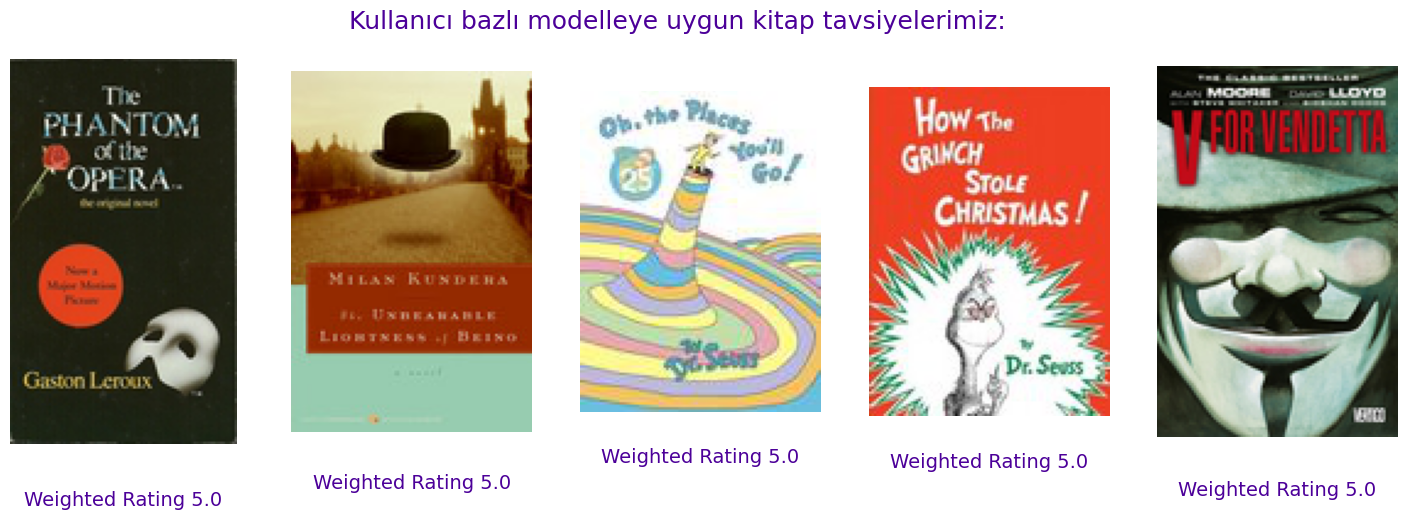

In [341]:
import matplotlib.pyplot as plt
from PIL import Image
import requests


fig, axs = plt.subplots(1, 5,figsize=(18,5))
fig.suptitle('Kullanıcı bazlı modelleye uygun kitap tavsiyelerimiz:', color="#4C0099",size = 18)
for i in range(5):
        
                url = book.loc[book['book_title'] == books_recommend['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('Weighted Rating {}'.format(books_recommend['weighted_rating'].tolist()[i]), y=-0.18,color="#4C0099",fontsize=14)
               
            

fig.show()

#### Function

In [250]:

def create_user_book_df():
    import pandas as pd
    book= pd.read_csv('df_final_21_09___9794.csv',index_col=0)
    rating = pd.read_csv('ratings.csv')
    df=rating.merge(book[["book_id","book_title","book_authors"]],on="book_id")  
    comment_counts = pd.DataFrame(df["book_title"].value_counts())
    rare_books = comment_counts[comment_counts["book_title"] <= 100].index
    common_books = df[~df["book_title"].isin(rare_books)]
    user_book_df = common_books.pivot_table(index=["user_id"], columns=["book_title"], values="rating")
    return user_book_df

user_book_df = create_user_book_df()



def user_based_recommender(random_user, user_book_df, ratio=30, cor_th=0.30, score=3.5):
    import pandas as pd
    random_user_df = user_book_df[user_book_df.index == random_user]
    books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
    books_read_df = user_book_df[books_read]
    user_book_count = books_read_df.T.notnull().sum()
    user_book_count = user_book_count.reset_index()
    user_book_count.columns = ["user_id", "book_count"]
    perc = len(books_read) * ratio / 100
    users_same_books = user_book_count[user_book_count["book_count"] > perc]["user_id"]

    final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)],
                          random_user_df[books_read]])

    corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
    corr_df = pd.DataFrame(corr_df, columns=["corr"])
    corr_df.index.names = ['user_id_1', 'user_id_2']
    corr_df = corr_df.reset_index()

    top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= cor_th)][
        ["user_id_2", "corr"]].reset_index(drop=True)

    top_users = top_users.sort_values(by='corr', ascending=False)
    top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
    rating = pd.read_csv('ratings.csv')
    top_users_ratings = top_users.merge(rating[["user_id", "book_id", "rating"]], how='inner')
    top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']

    recommendation_df = top_users_ratings.groupby('book_id').agg({"weighted_rating": "mean"})
    recommendation_df = recommendation_df.reset_index()

    books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > score].sort_values("weighted_rating", ascending=False)
    book= pd.read_csv('df_final_21_09___9794.csv',index_col=0)
    return books_to_be_recommend.merge(book[["book_id", "book_title"]])

books_recommend = books_to_be_recommend.merge(book[["book_id", "book_title"]])

def fig_plot(user_based_recommender):
    import matplotlib.pyplot as plt
    from PIL import Image
    import requests
    
    
    fig, axs = plt.subplots(1, 5,figsize=(18,5))
    fig.suptitle('Kullanıcı bazlı modelleye uygun tavsiyelerimiz:', color="#4C0099",size = 18)
    for i in range(5):
        
                url = book.loc[book['book_title'] == books_recommend['book_title'].tolist()[i],'image_url_x'][:1].values[0]
                im = Image.open(requests.get(url, stream=True).raw)
                axs[i].imshow(im)
                axs[i].axis("off")
                axs[i].set_title('{}'.format(books_recommend['weighted_rating'].tolist()[i]), y=-0.18,color="#4C0099",fontsize=14)
               
            

    fig.show()


In [252]:
random_user = int(pd.Series(user_book_df.index).sample(1).values)

In [258]:
user_based_recommender(random_user, user_book_df, ratio=30,cor_th=0.30, score=3.5)


,book_id,weighted_rating,book_title
0,10,5.0,Pride and Prejudice
1,3887,5.0,The Secret
2,1145,5.0,We Were the Mulvaneys
3,876,5.0,Curious George
4,739,5.0,Different Seasons
5,1781,5.0,Don't Let the Pigeon Drive the Bus
6,2023,5.0,Forrest Gump
7,587,5.0,Everything Is Illuminated
8,476,5.0,The World According to Garp
9,2438,5.0,There Was an Old Lady Who Swallowed a Fly


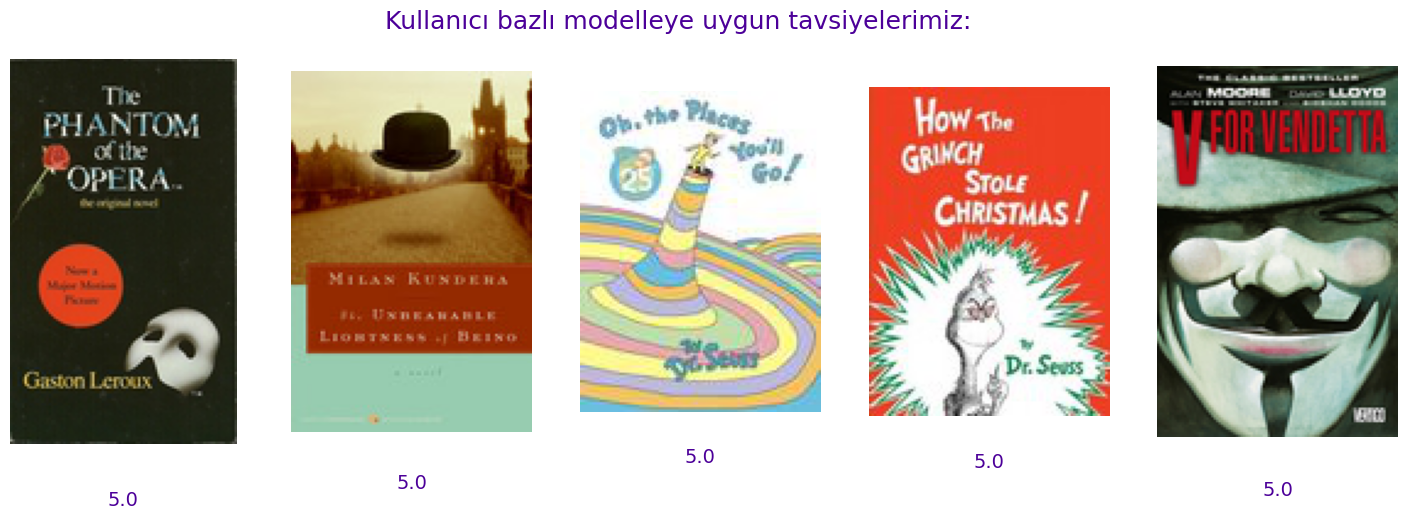

In [333]:
fig_plot(user_based_recommender)
